In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def plot_metric_over_processing(csv_filenames, approach_names, metrics, test_result_path, approach_title):
    result_csv_types = ["_best_f1_state", "_best_loss_state", "_best_eod_state"]
    
    # Prepare the list of CSV filenames for each result_csv_type
    new_csv_filenames = []
    for result_csv_type in result_csv_types:
        csv_files = [f"../../benchmark_test_results/{test_result_path}/{csv_filename}{result_csv_type}.csv" for csv_filename in csv_filenames]
        new_csv_filenames.append(csv_files)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns for the subplots
    
    for i, csv_files in enumerate(new_csv_filenames):

        for approach_name in approach_names:
            approach_metric_values = []
            approach_metric_data = {metric: [] for metric in metrics}
            
            for filename in csv_files:
                df = pd.read_csv(filename)
                row_dict = df[df['name'] == approach_name].to_dict(orient="records")
                approach_metric_values.extend(row_dict)
            #print(approach_metric_values)

            for entry in approach_metric_values:
                for metric in metrics:
                    approach_metric_data[metric].append(entry[metric])
        
            x_values = [0, 0.2, 0.4, 0.6, 0.8, 0.99]
        
            #print(approach_metric_data)
            for metric in metrics:
                axes[i].plot(x_values, approach_metric_data[metric], label=f"{approach_name} {metric}")

        axes[i].set_xlabel('Correlation')
        axes[i].set_ylabel('Score')
        axes[i].set_title(f'Plot for {result_csv_types[i]}')
        axes[i].legend()
        axes[i].grid(True)
        axes[i].set_yticks(np.arange(0, 1.1, 0.1))

    plt.suptitle(approach_title)
    plt.tight_layout()
    plt.show()

In [44]:
def plot_metric_over_processing__single_plot(csv_filenames, approach_names, metrics, test_result_path, approach_title):
    
    csv_files = [f"../../benchmark_test_results/{test_result_path}/{csv_filename}_best_f1_state.csv" for csv_filename in csv_filenames]
    
    fig, ax = plt.subplots(figsize=(18, 8))

    for approach_name in approach_names:
        approach_metric_values = []
        approach_metric_data = {metric: [] for metric in metrics}
        
        for filename in csv_files:
                df = pd.read_csv(filename)
                row_dict = df[df['name'] == approach_name].to_dict(orient="records")
                approach_metric_values.extend(row_dict)

        for entry in approach_metric_values:
            for metric in metrics:
                approach_metric_data[metric].append(entry[metric])
    
        x_values = [0, 0.2, 0.4, 0.6, 0.8, 0.99]
    
        #print(approach_metric_data)
        for metric in metrics:
            if metric == "test_f1":
                label_metric = "F1" 
            else:
                label_metric = "EOD"
            ax.plot(x_values, approach_metric_data[metric], label=f"{approach_name} {label_metric}")
        
    ax.set_xlabel('Correlation (Bias)', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set_title(f'{approach_title} Test Results with Increasing Bias', fontsize=14)
    ax.legend(fontsize=14)
    ax.grid(True)
    ax.set_yticks(np.arange(0, 1.1, 0.1))

    plt.tight_layout()
    plt.savefig(f"../dataset_plots/skew_progression/skew_progression {approach_title}.png", dpi=200)
    plt.show()

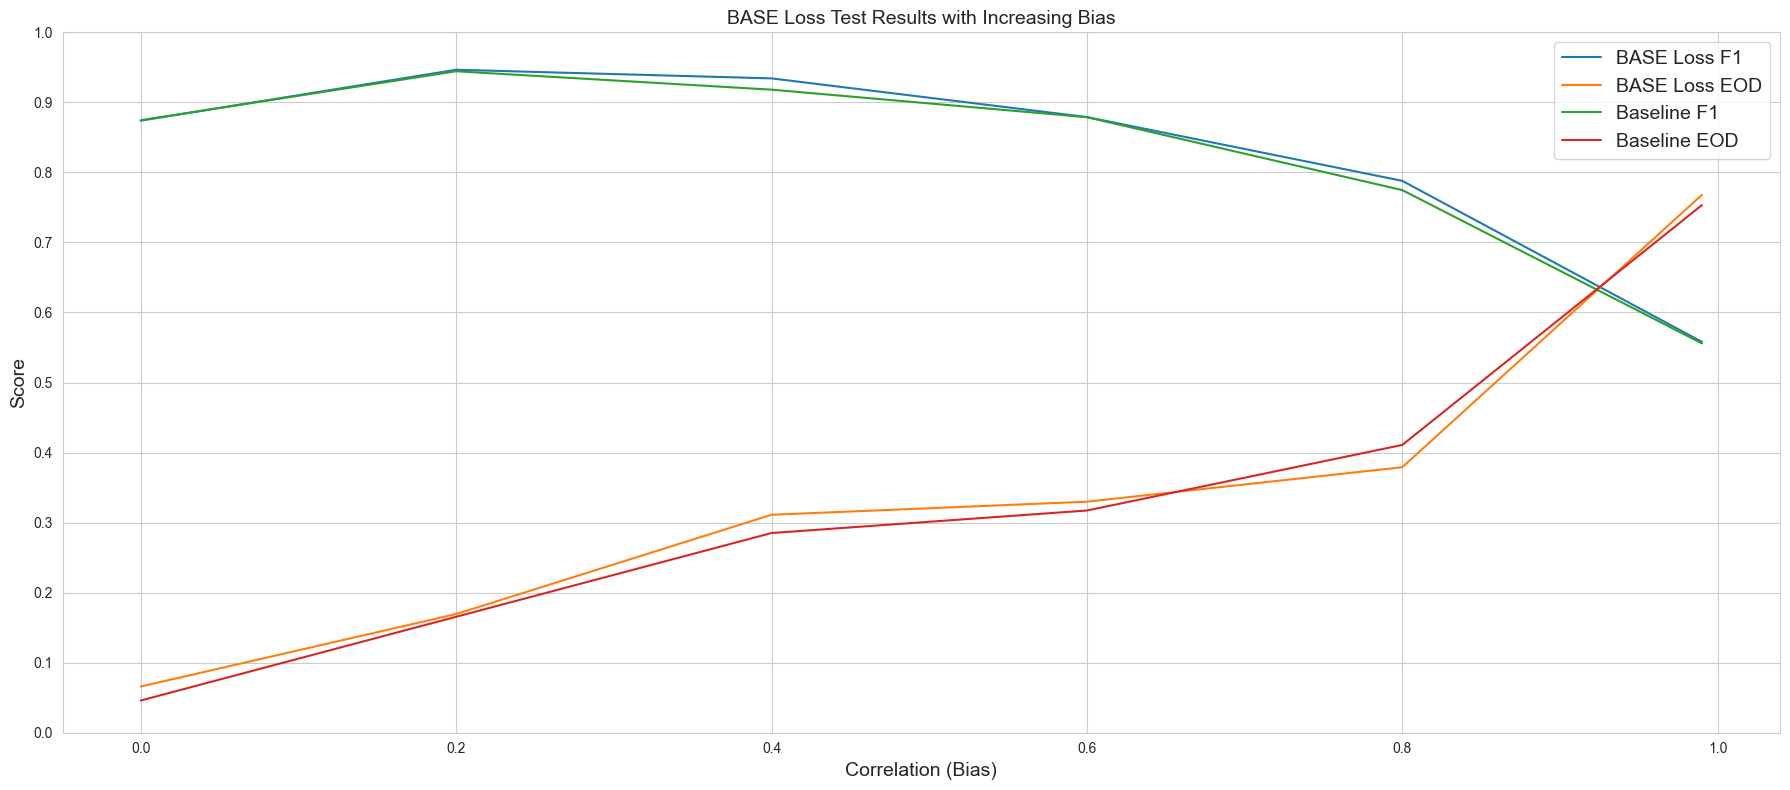

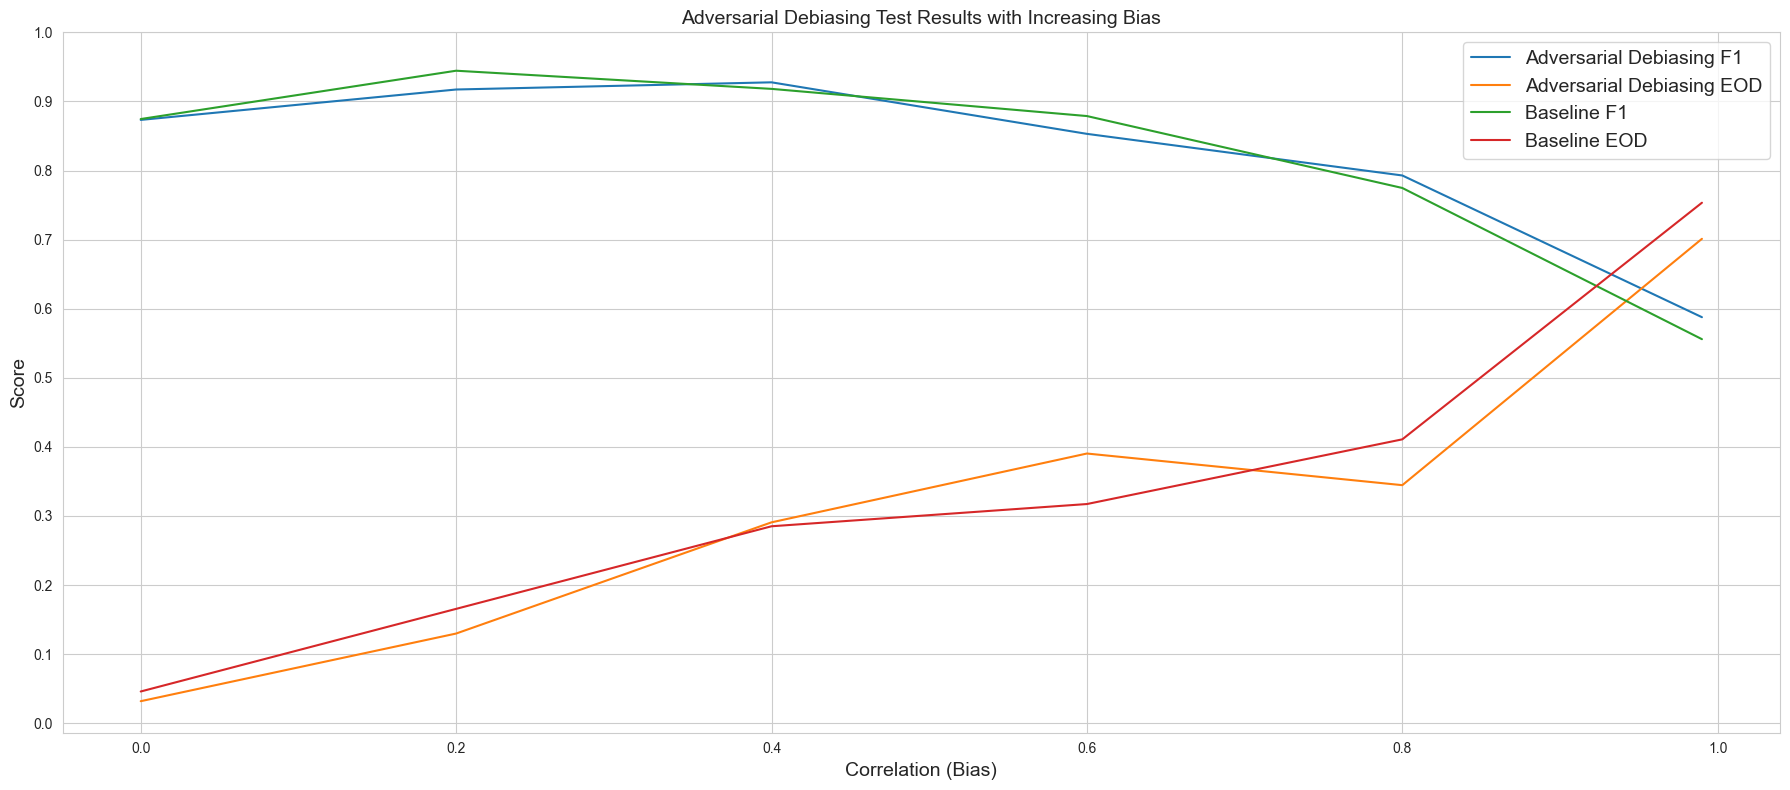

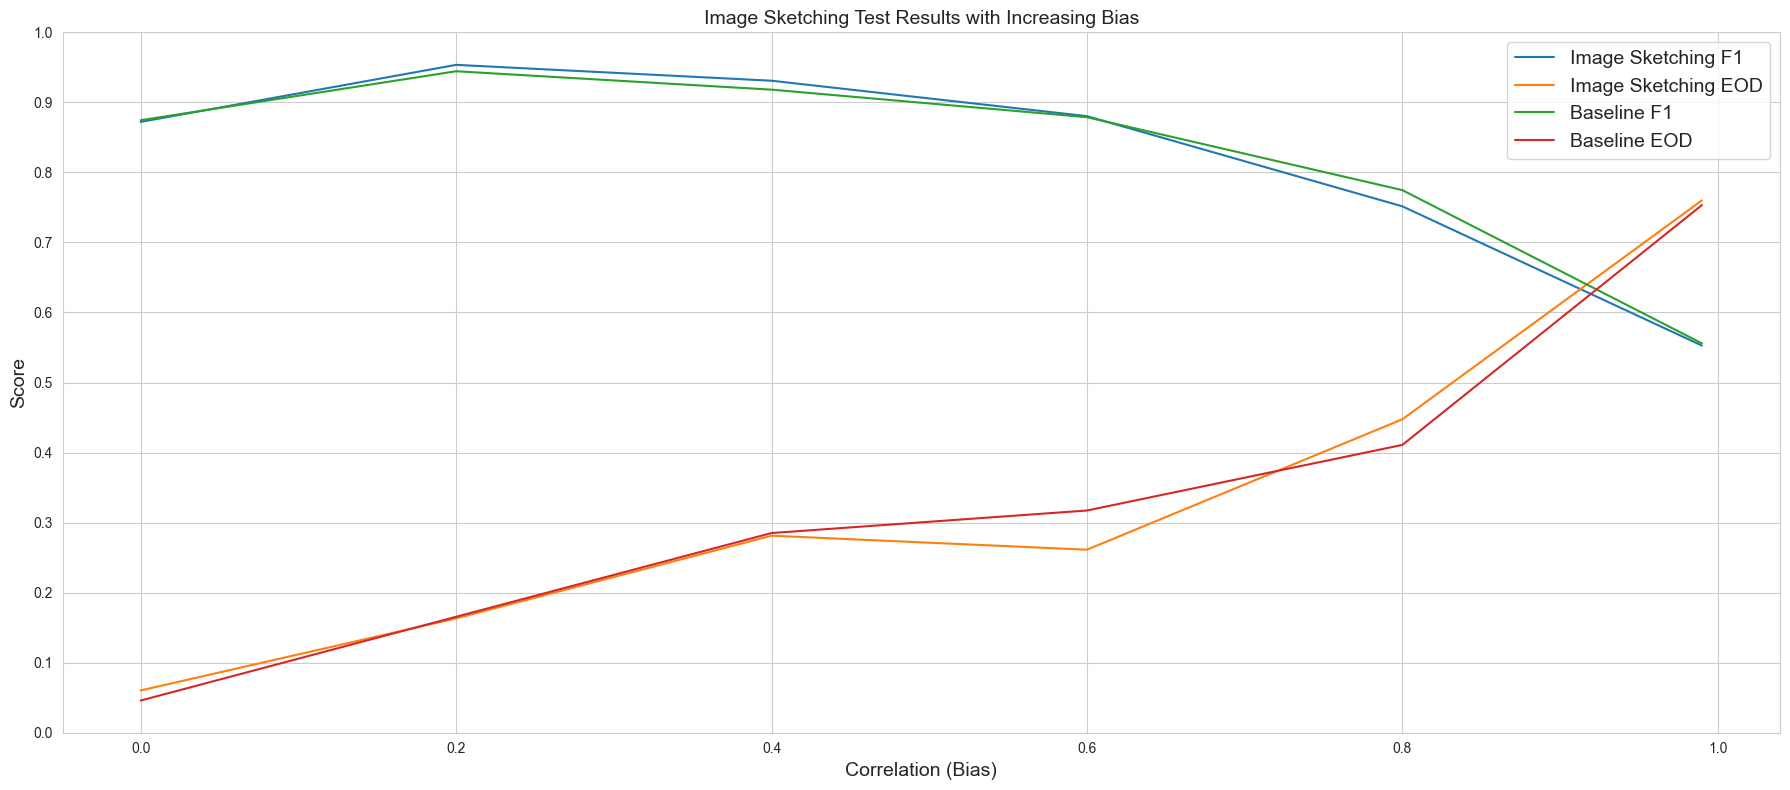

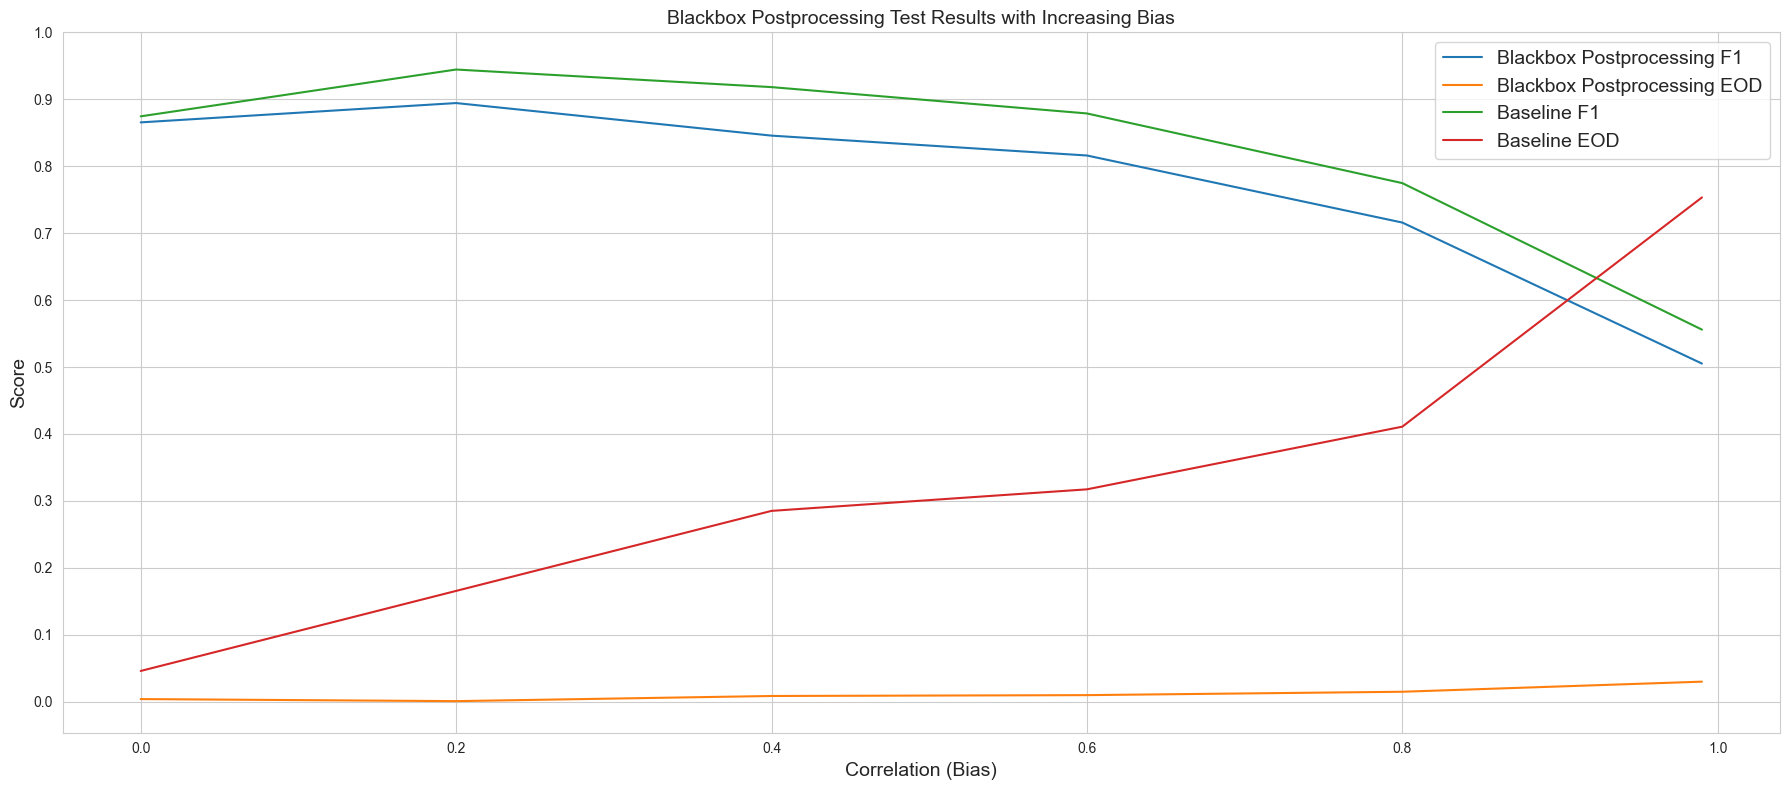

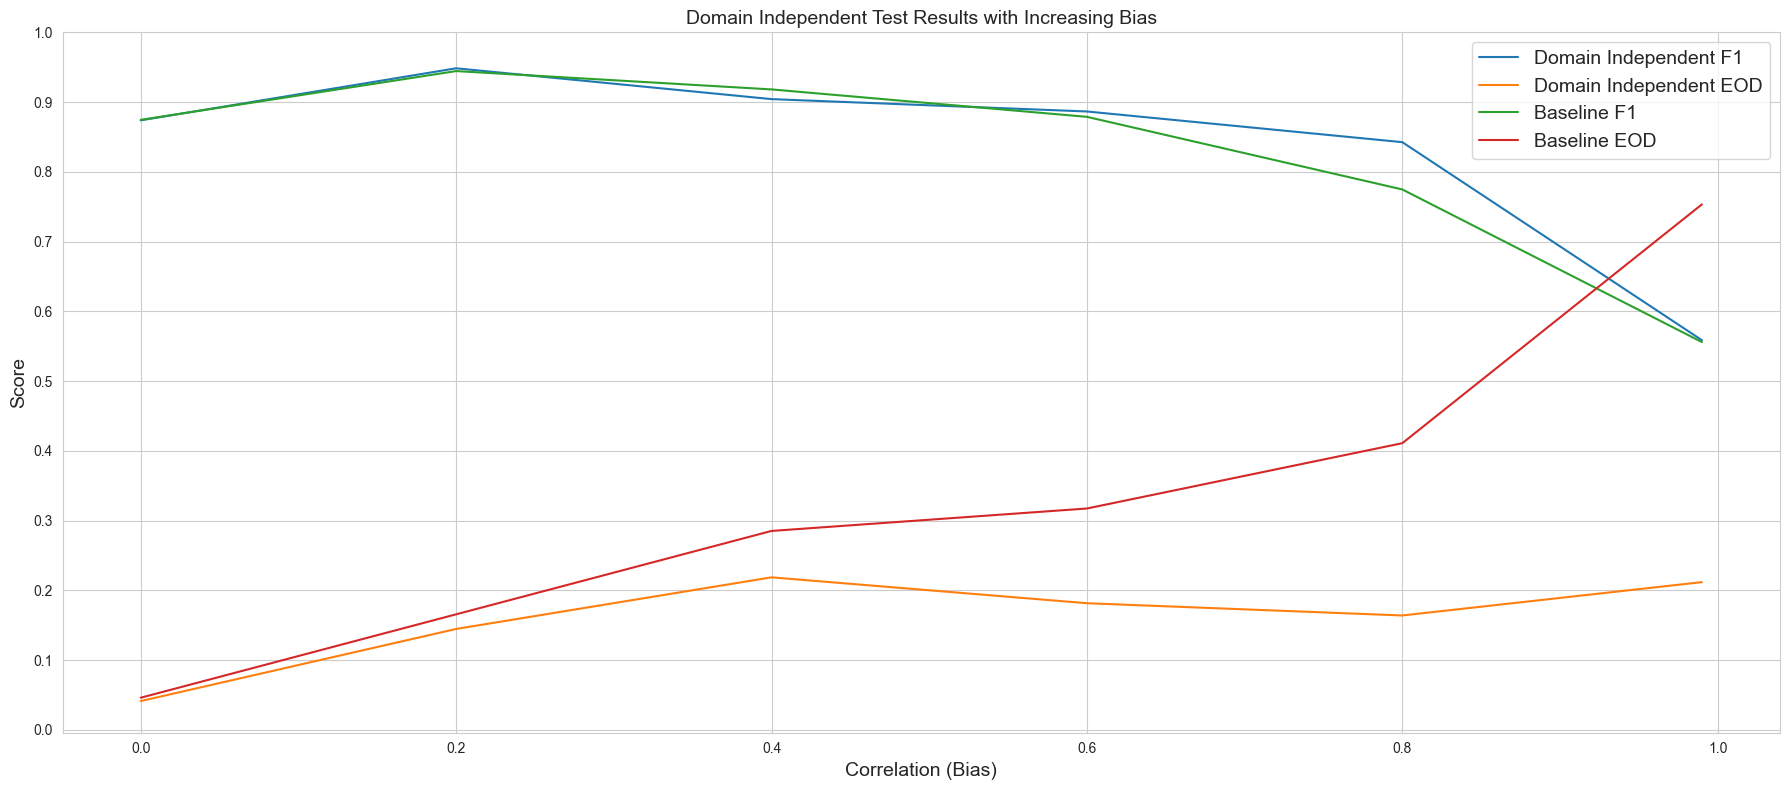

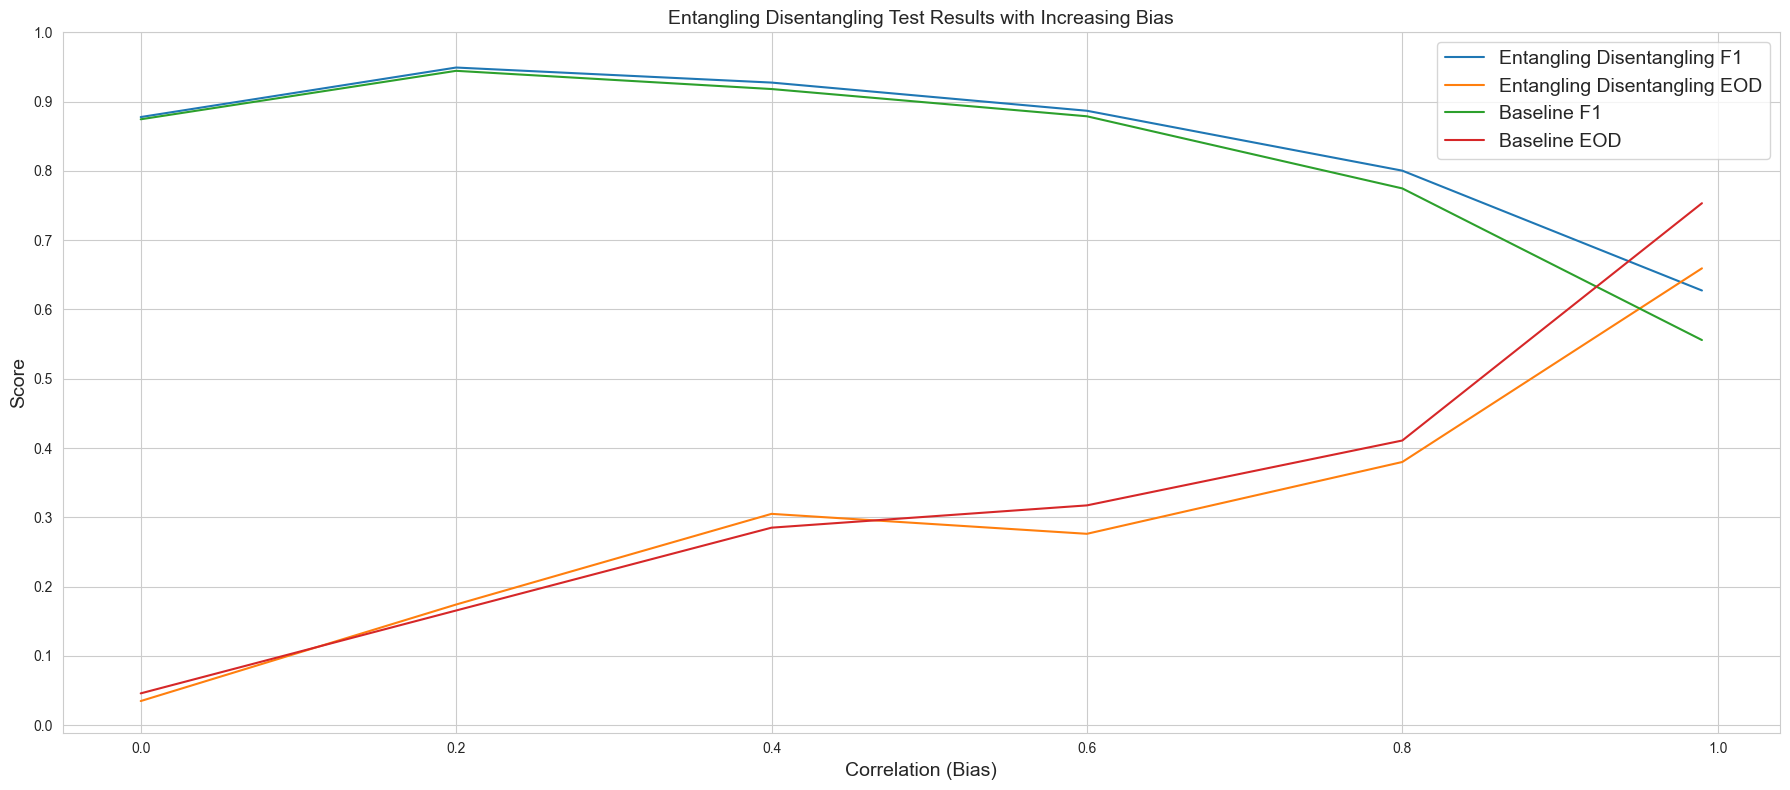

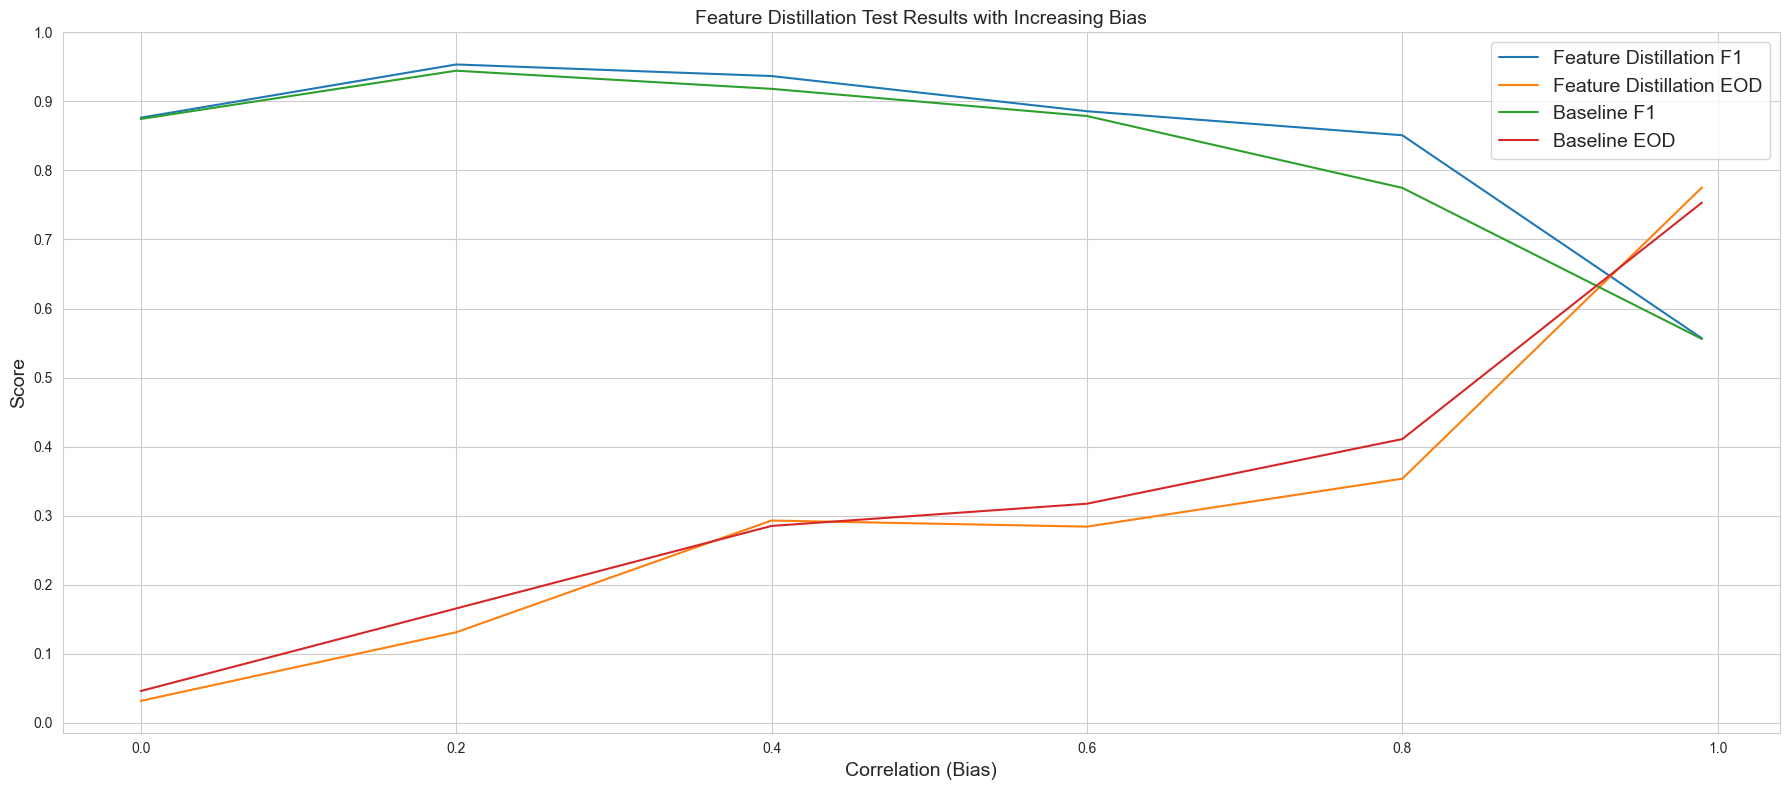

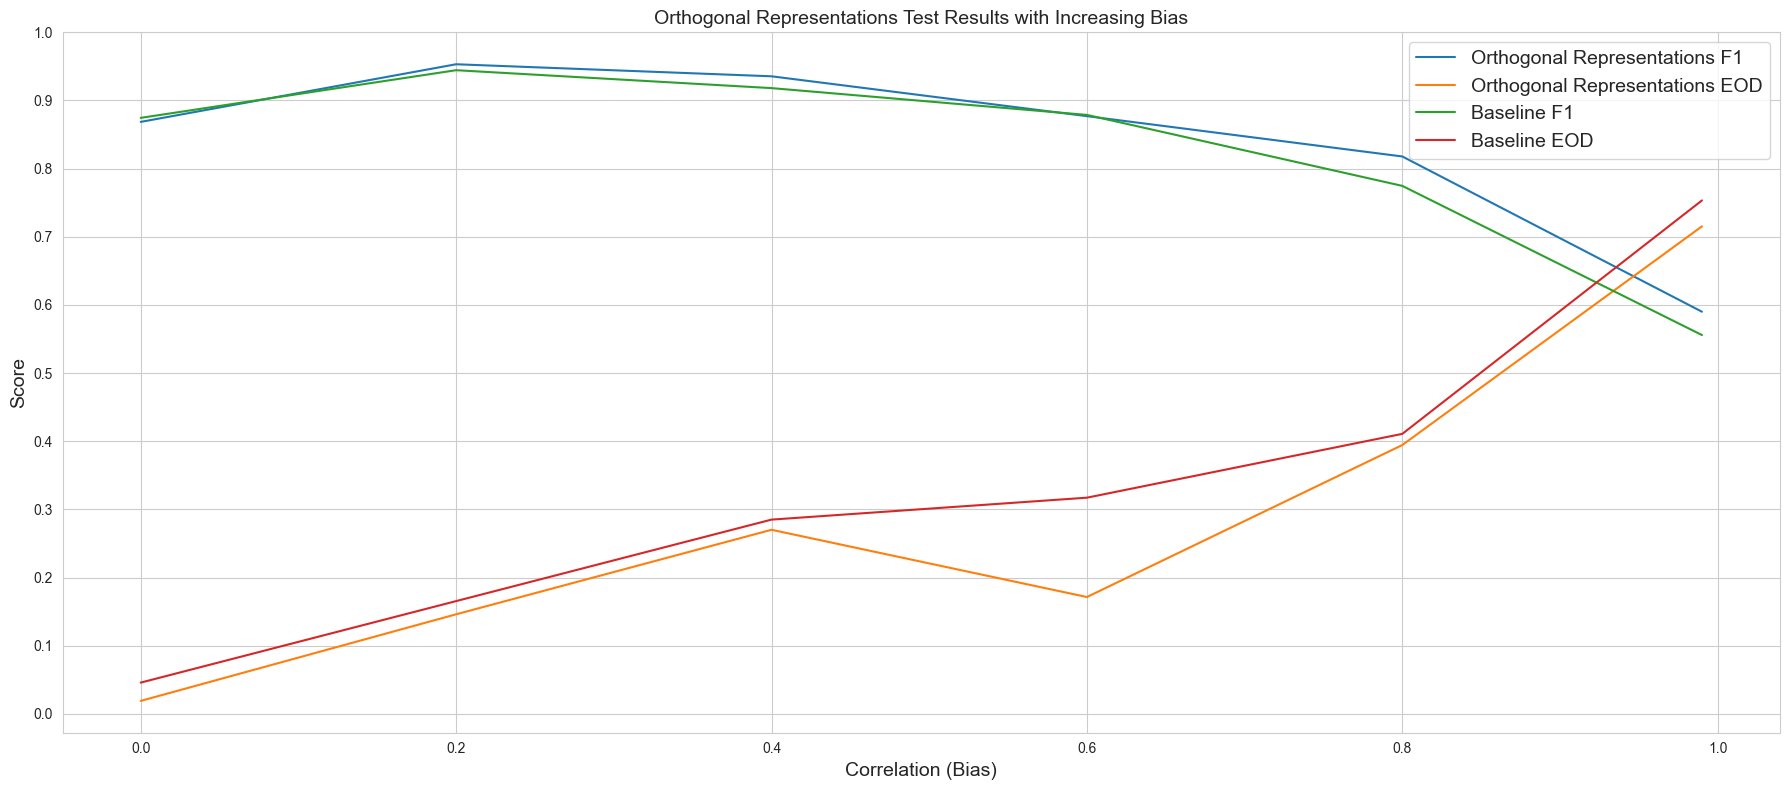

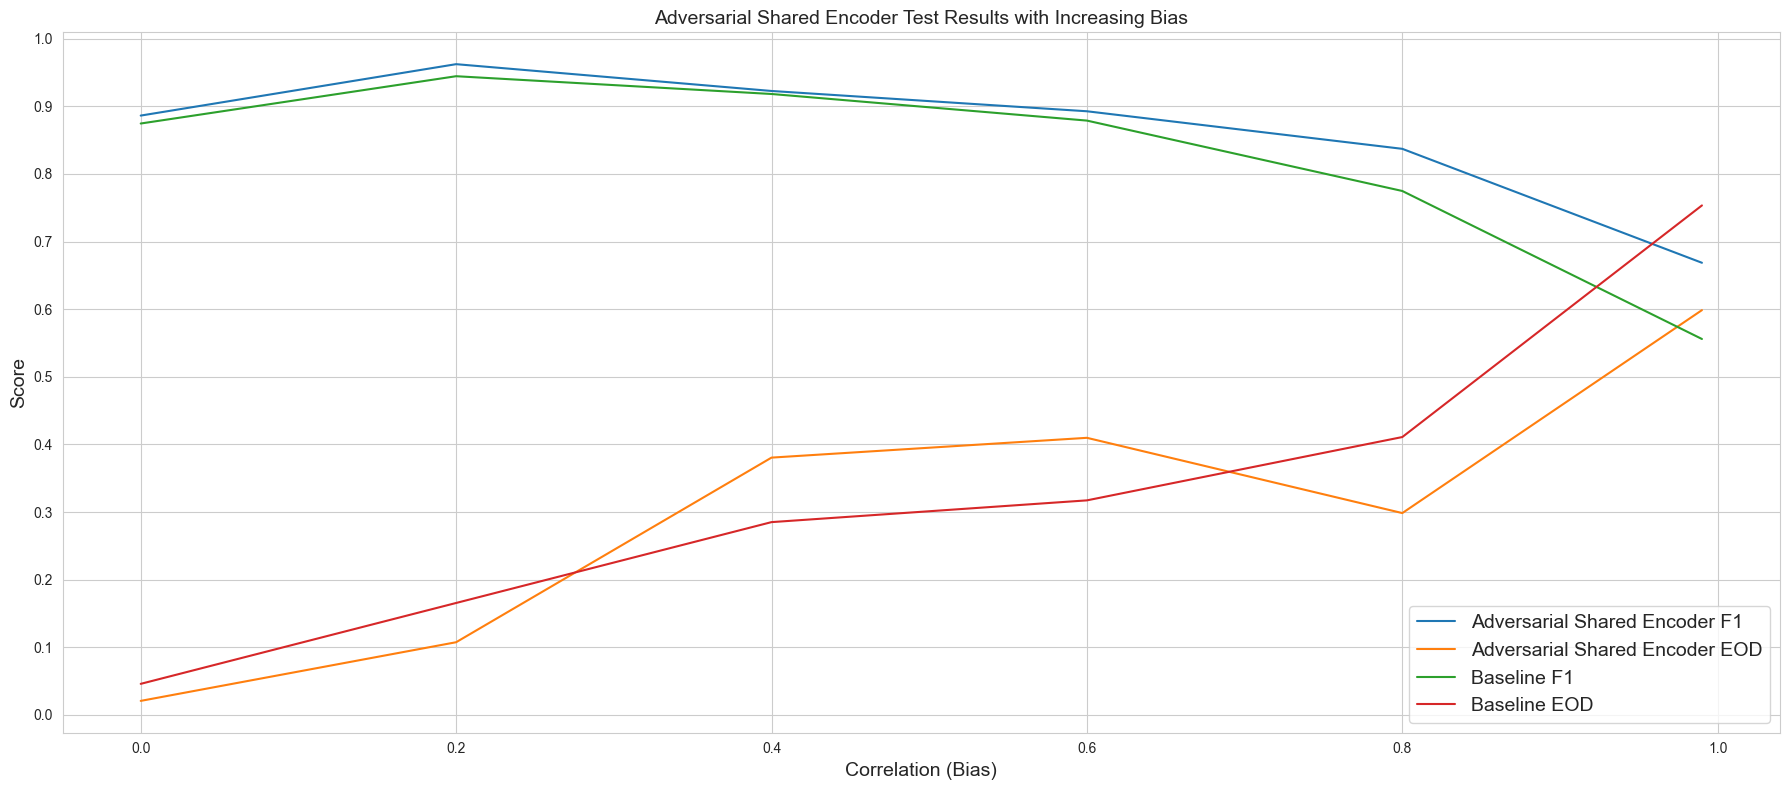

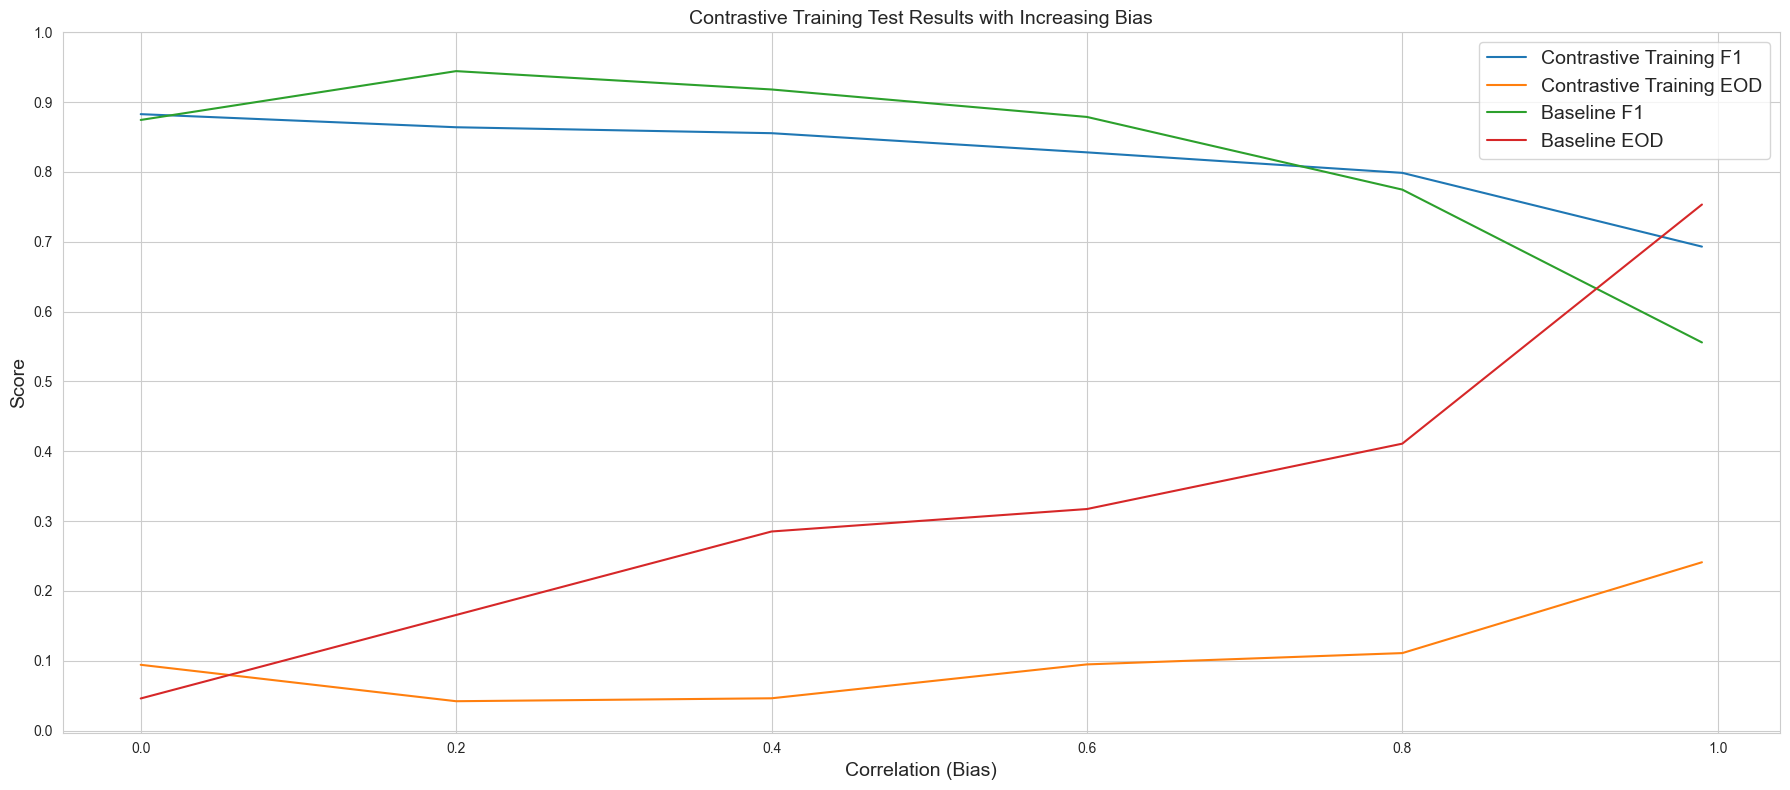

In [45]:
approaches = ["BASE Loss", "Adversarial Debiasing", "Image Sketching", "Blackbox Postprocessing", "Domain Independent", "Entangling Disentangling", "Feature Distillation", "Orthogonal Representations", "Adversarial Shared Encoder", "Contrastive Training"]
csv_filenames = ['v2_target_strong_nose', 'skew02_v1_strong_nose_normal_dataset', 'skew04_v1_strong_nose_normal_dataset', "skew06_v1_strong_nose_normal_dataset", "skew08_v1_strong_nose_normal_dataset", "skew099_v1_strong_nose_normal_dataset"]
metrics = ['test_f1', "test_eod"]
for a in approaches:
    processing_name = [a, "Baseline"]
    plot_metric_over_processing__single_plot(csv_filenames, processing_name, metrics, "lfw", a)

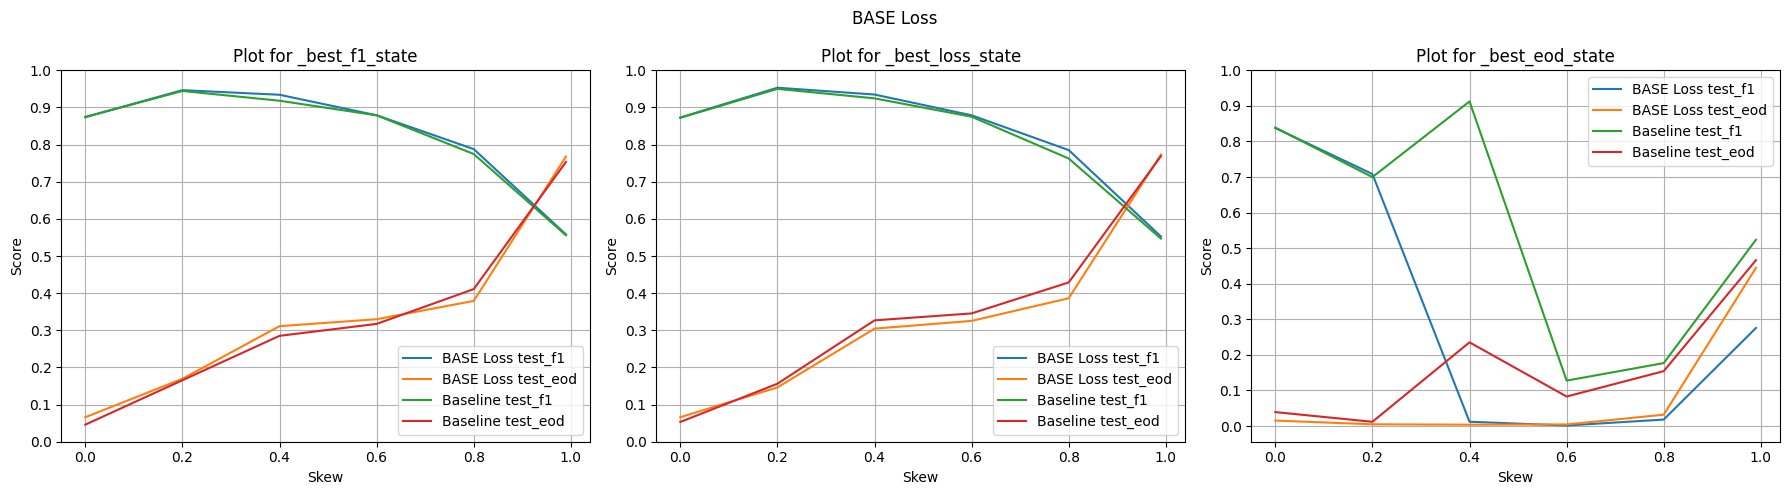

In [129]:
csv_filenames = ['v2_target_strong_nose', 'skew02_v1_strong_nose_normal_dataset', 'skew04_v1_strong_nose_normal_dataset', "skew06_v1_strong_nose_normal_dataset", "skew08_v1_strong_nose_normal_dataset", "skew099_v1_strong_nose_normal_dataset"]
processing_name = ['BASE Loss', "Baseline"]
metrics = ['test_f1', "test_eod"]
plot_metric_over_processing(csv_filenames, processing_name, metrics, "lfw", "BASE Loss")

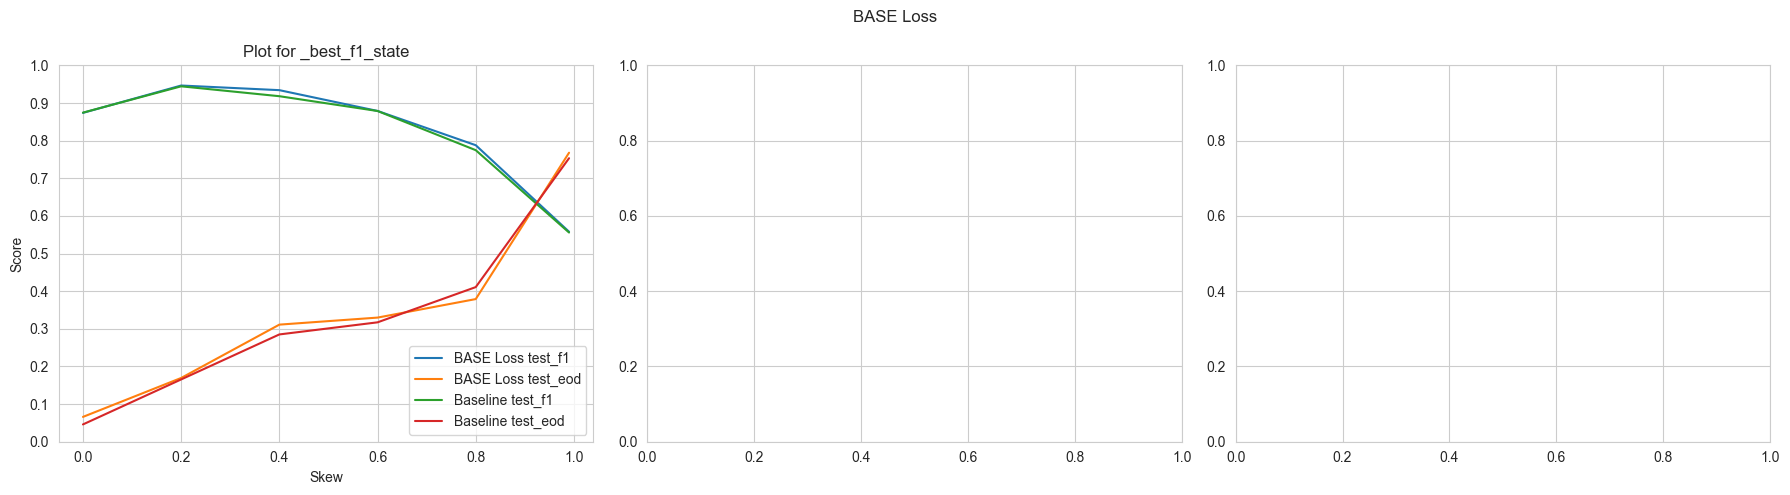

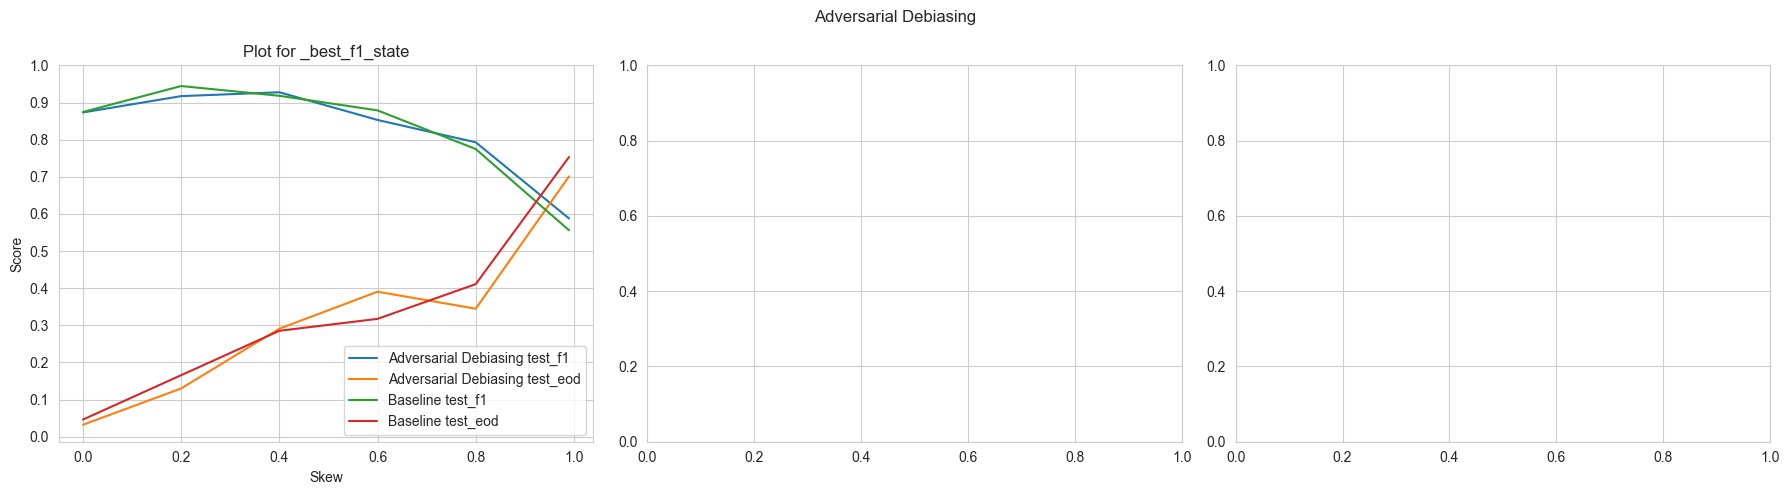

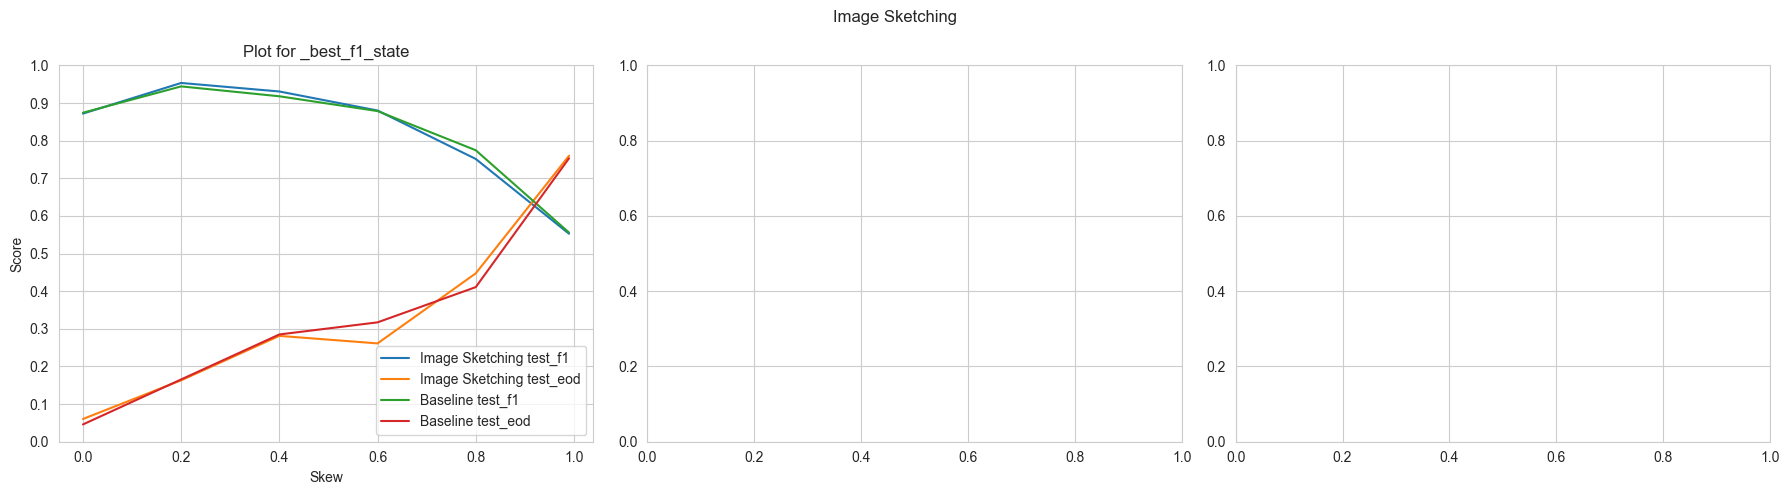

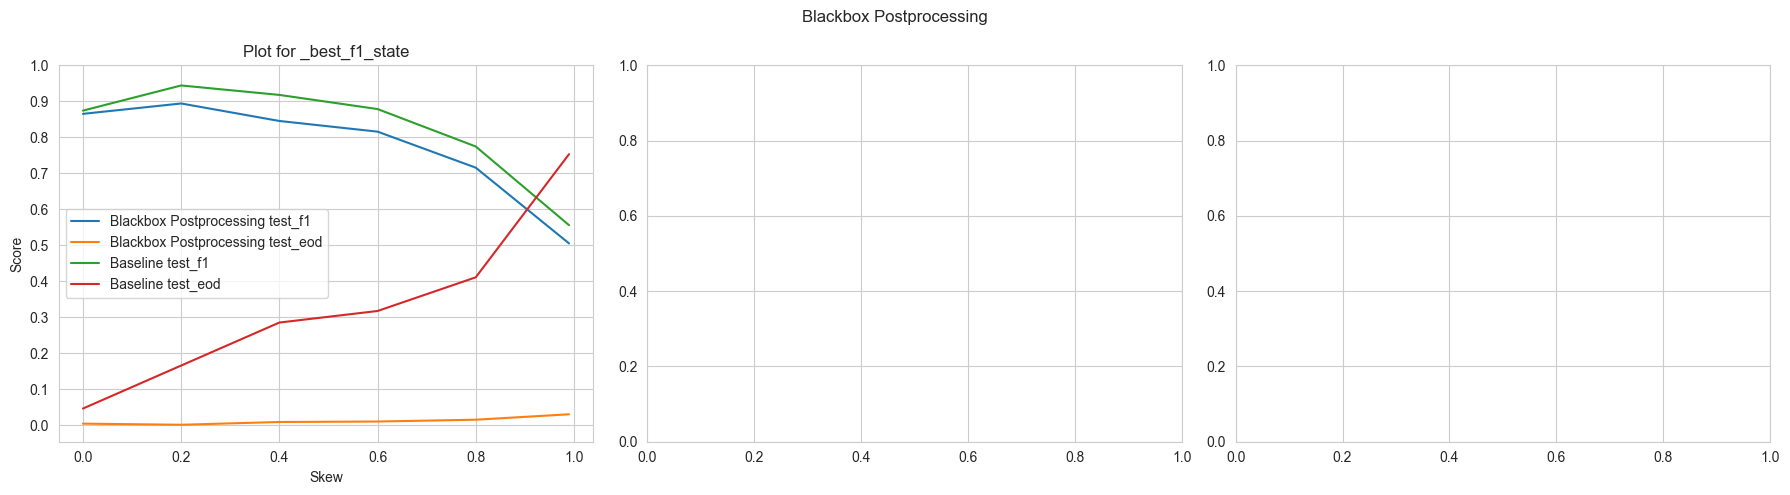

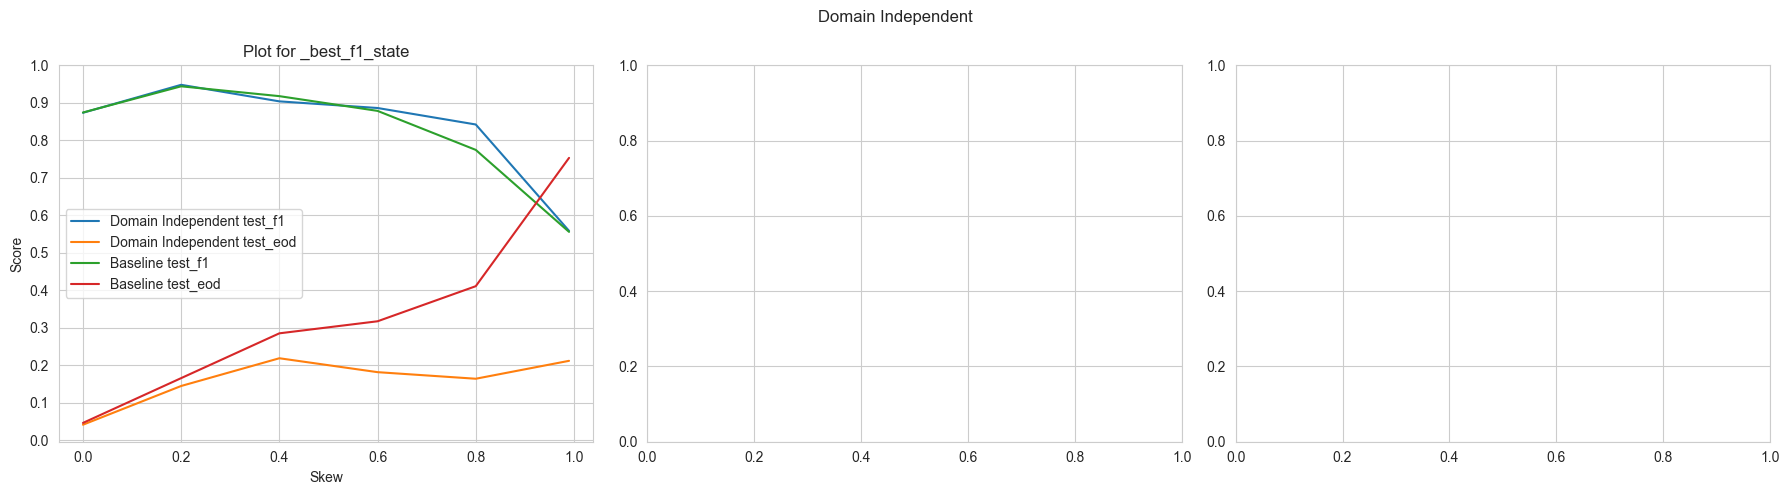

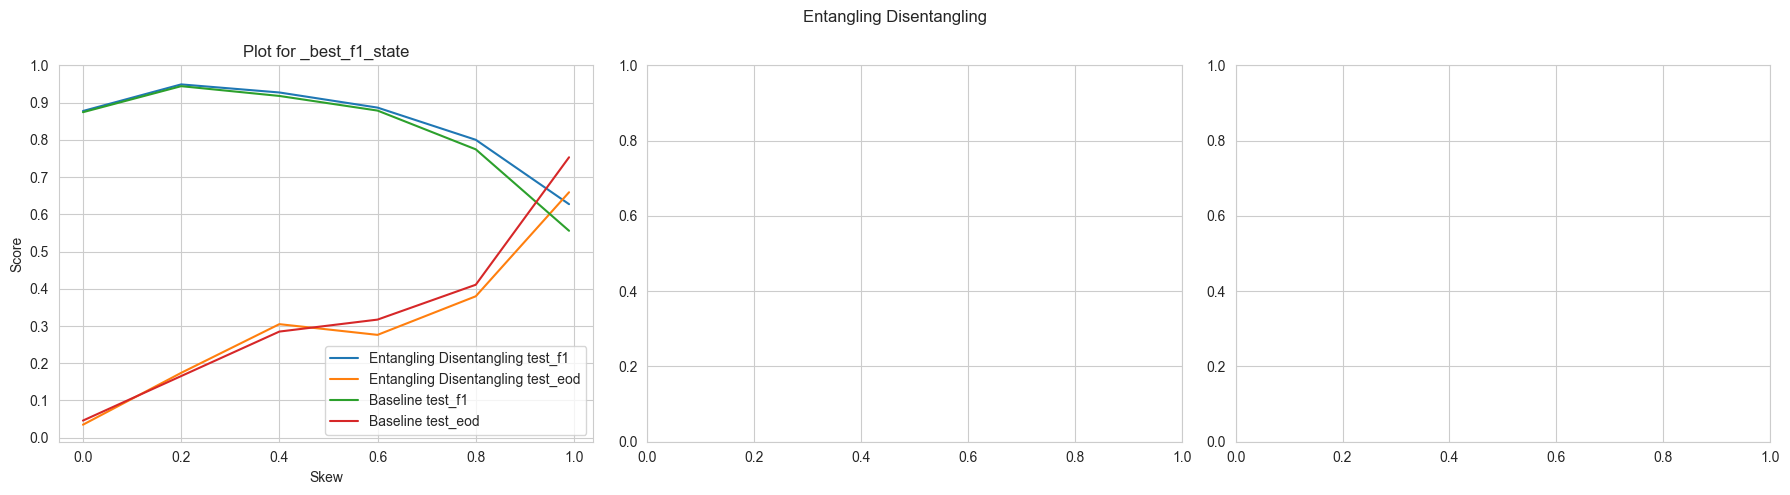

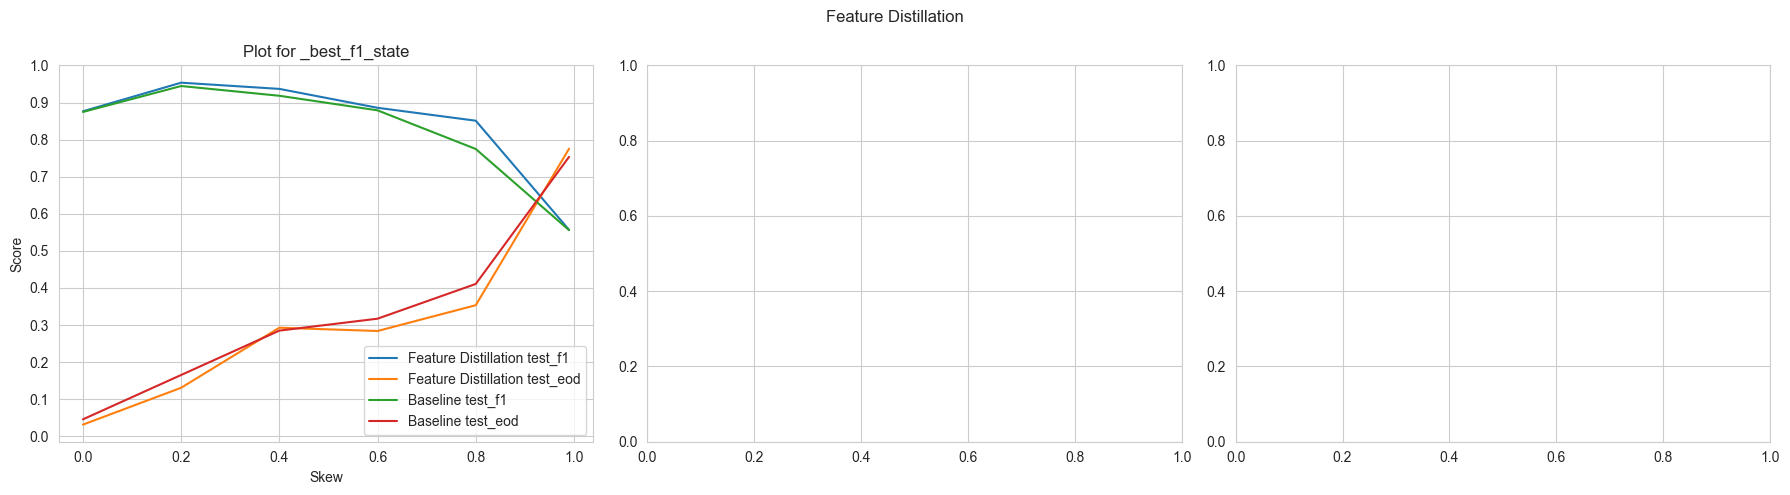

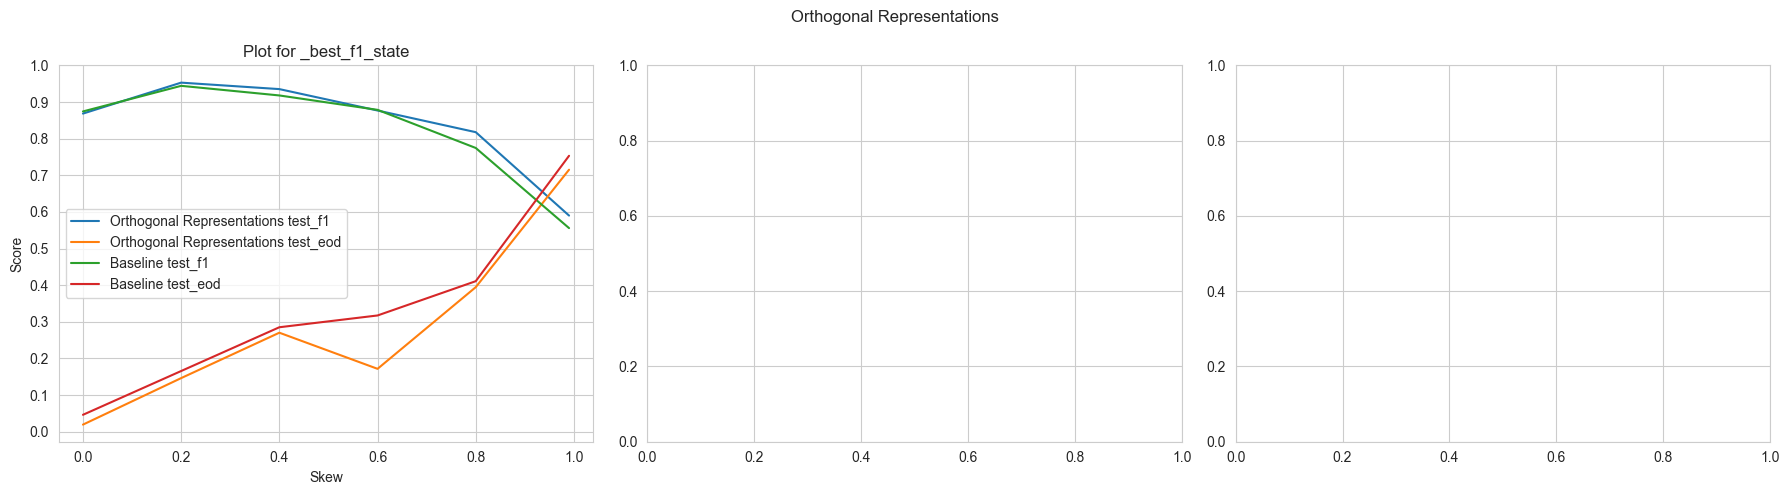

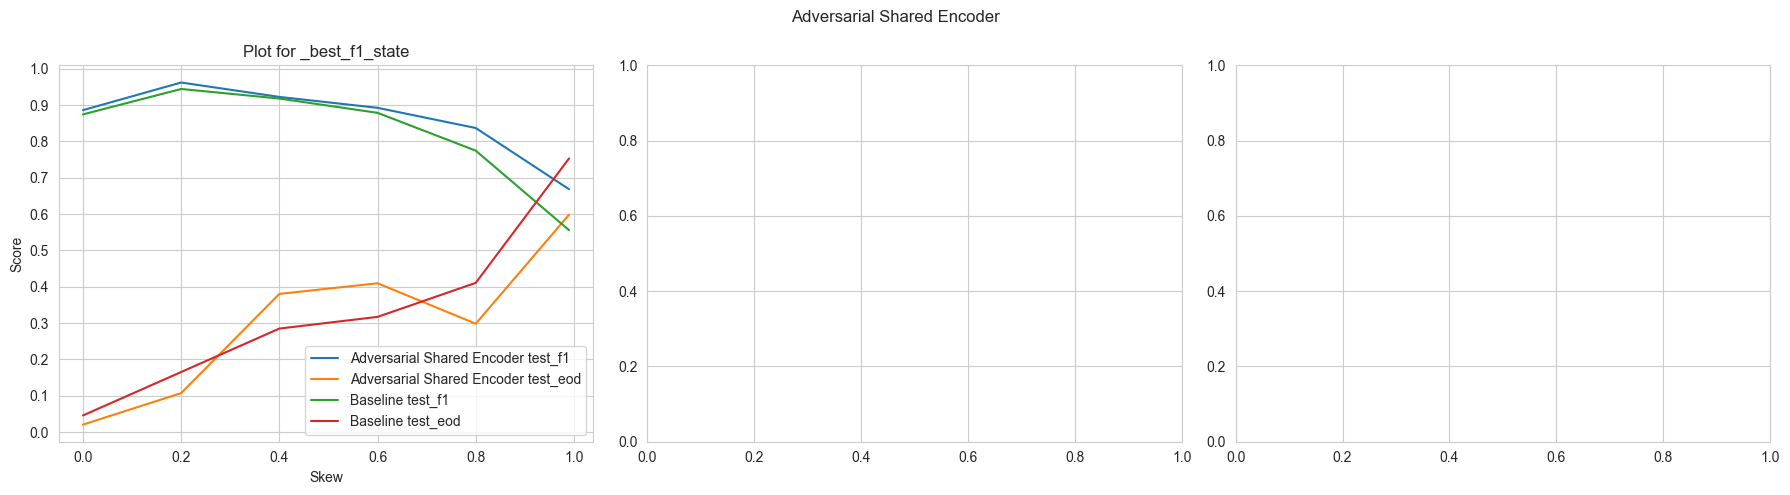

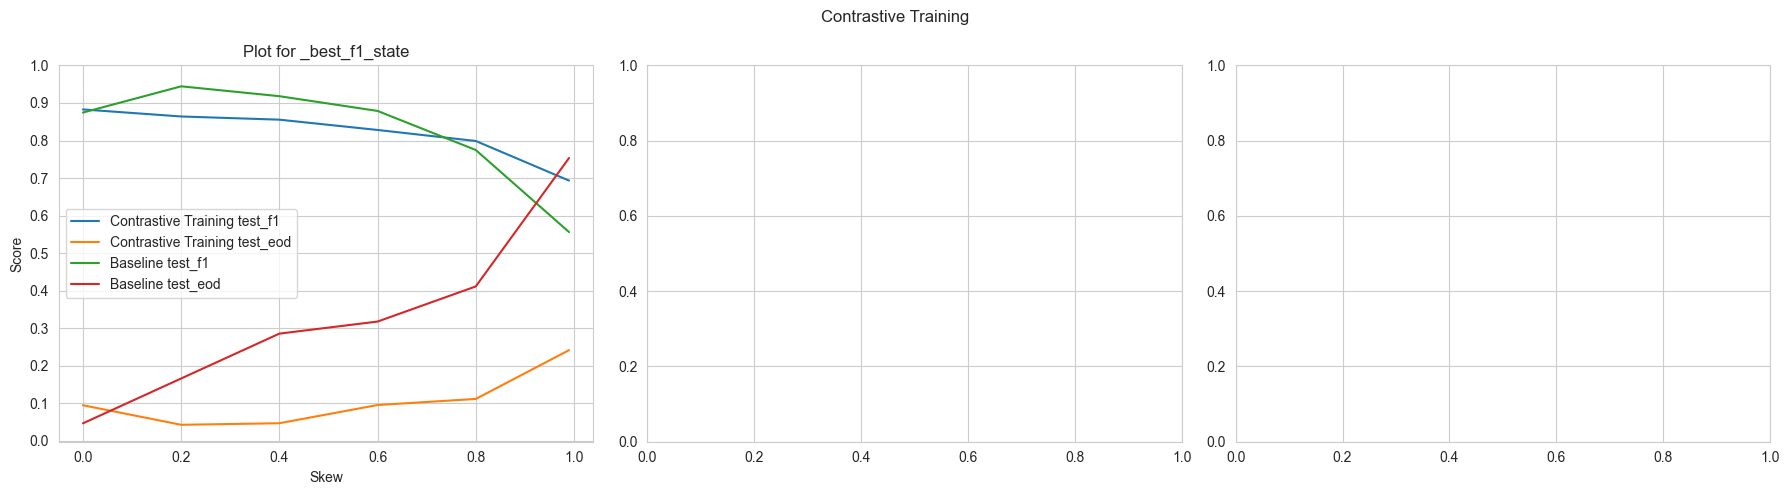

In [7]:
approaches = ["BASE Loss", "Adversarial Debiasing", "Image Sketching", "Blackbox Postprocessing", "Domain Independent", "Entangling Disentangling", "Feature Distillation", "Orthogonal Representations", "Adversarial Shared Encoder", "Contrastive Training"]
csv_filenames = ['v2_target_strong_nose', 'skew02_v1_strong_nose_normal_dataset', 'skew04_v1_strong_nose_normal_dataset', "skew06_v1_strong_nose_normal_dataset", "skew08_v1_strong_nose_normal_dataset", "skew099_v1_strong_nose_normal_dataset"]
metrics = ['test_f1', "test_eod"]
for a in approaches:
    processing_name = [a, "Baseline"]
    plot_metric_over_processing(csv_filenames, processing_name, metrics, "lfw", a)

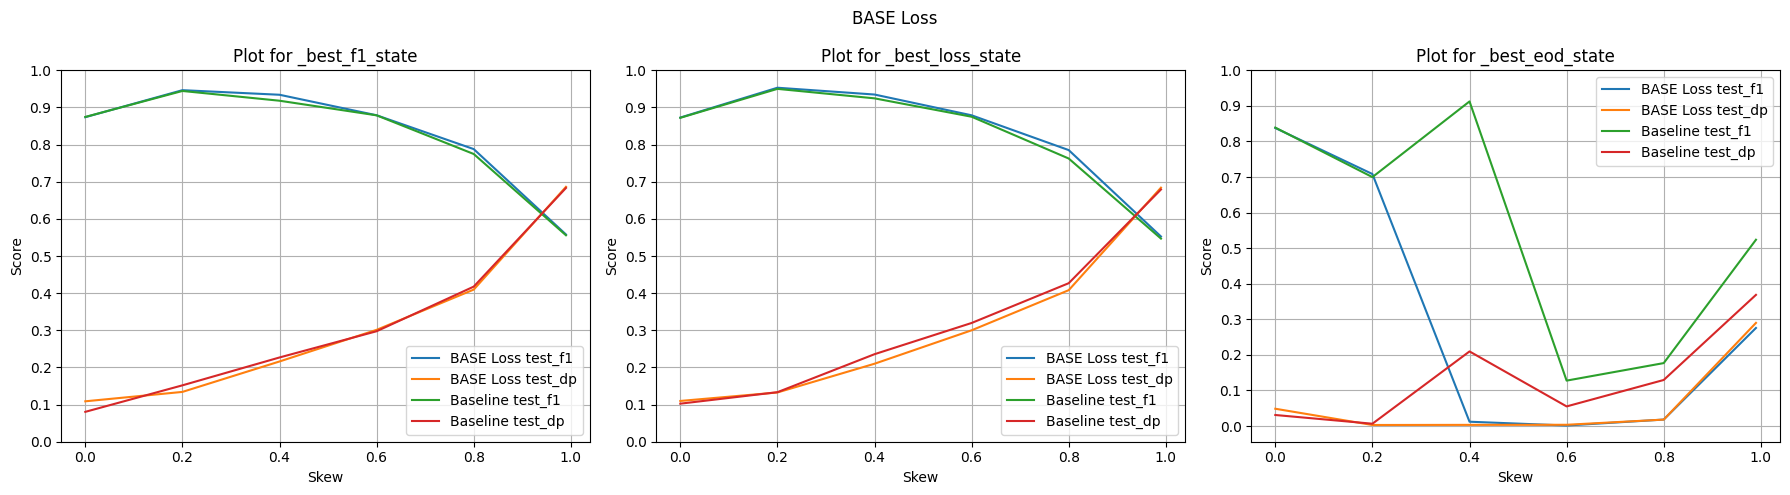

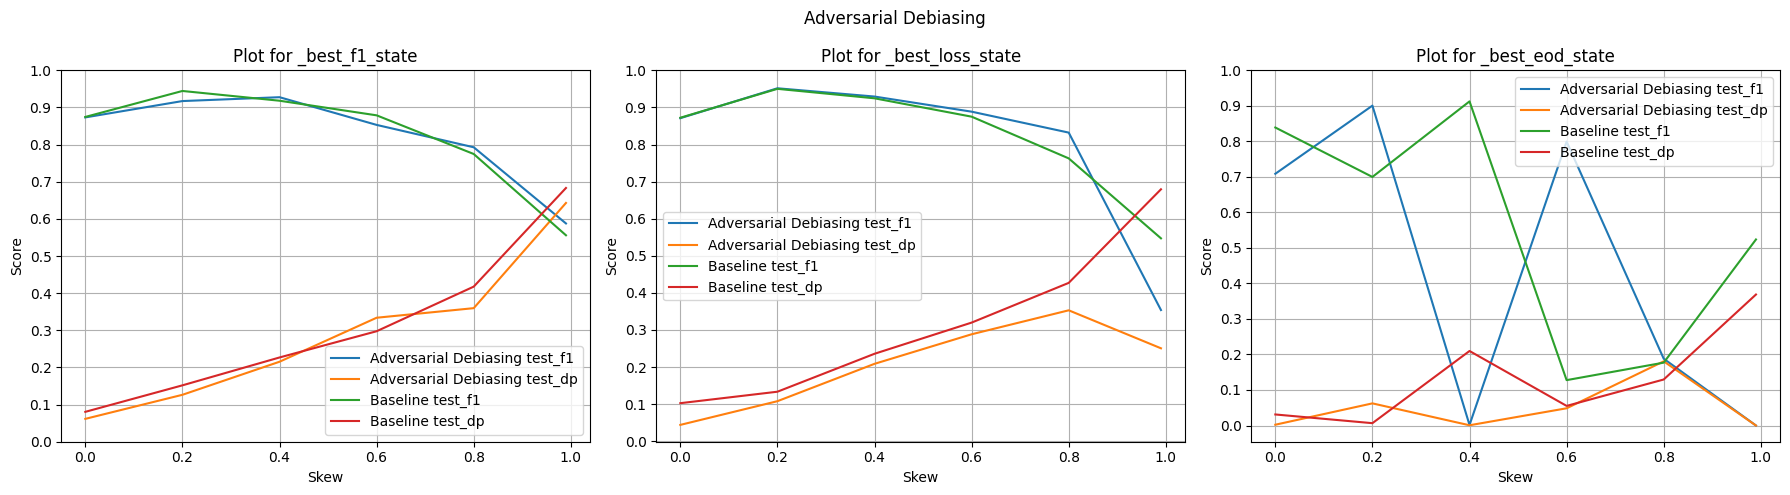

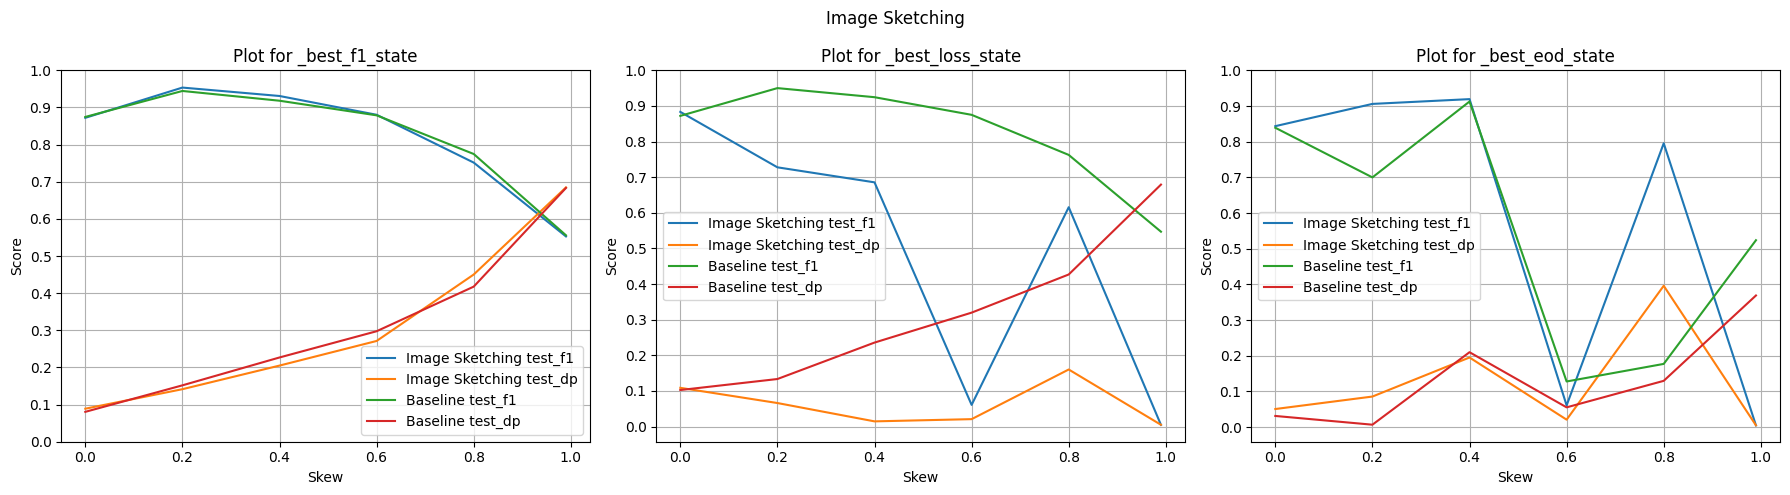

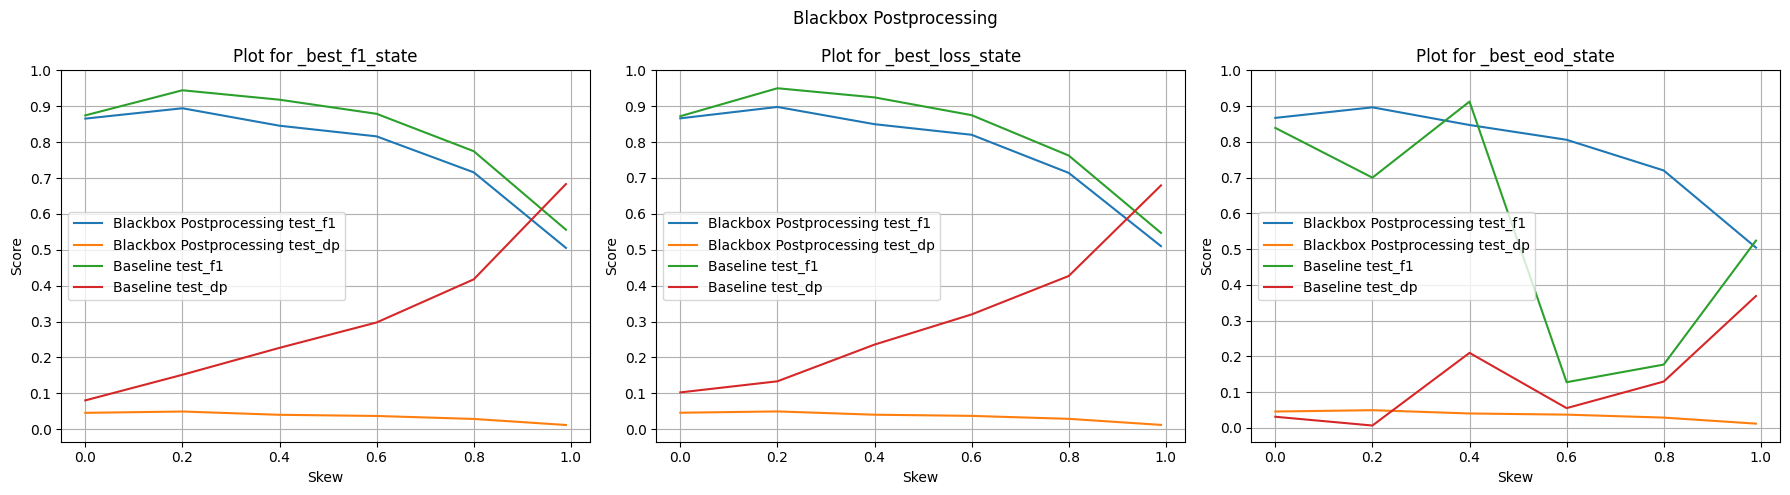

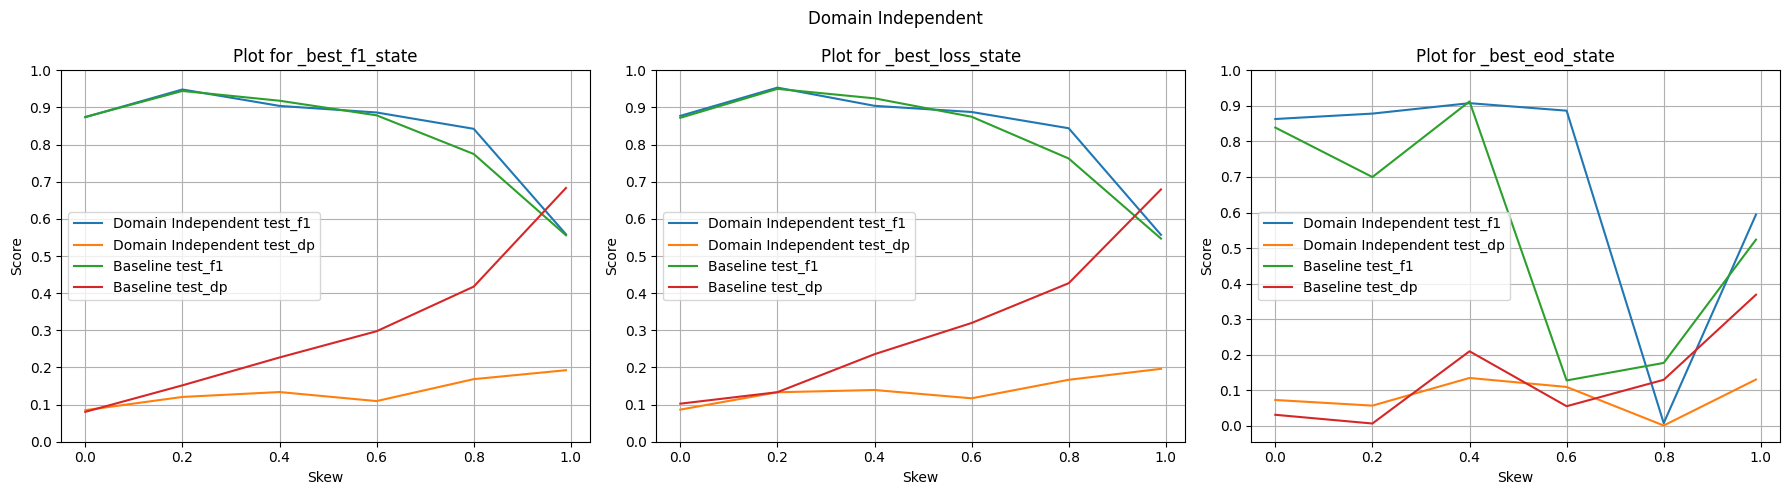

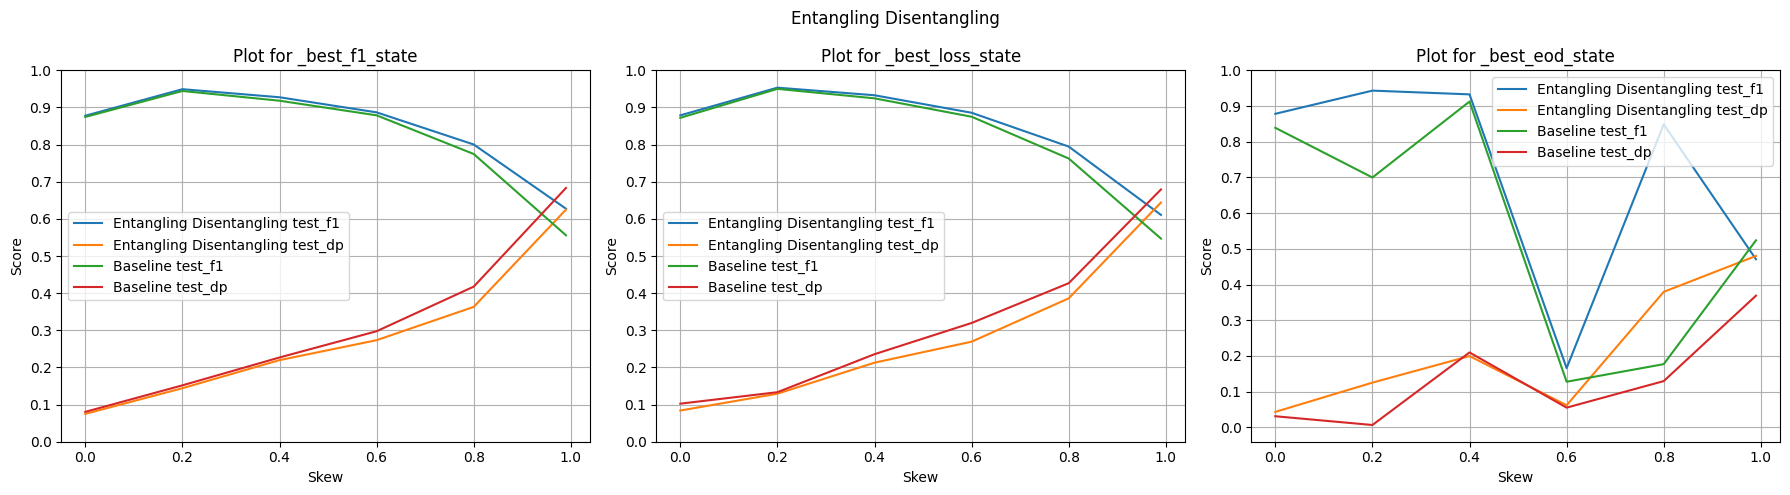

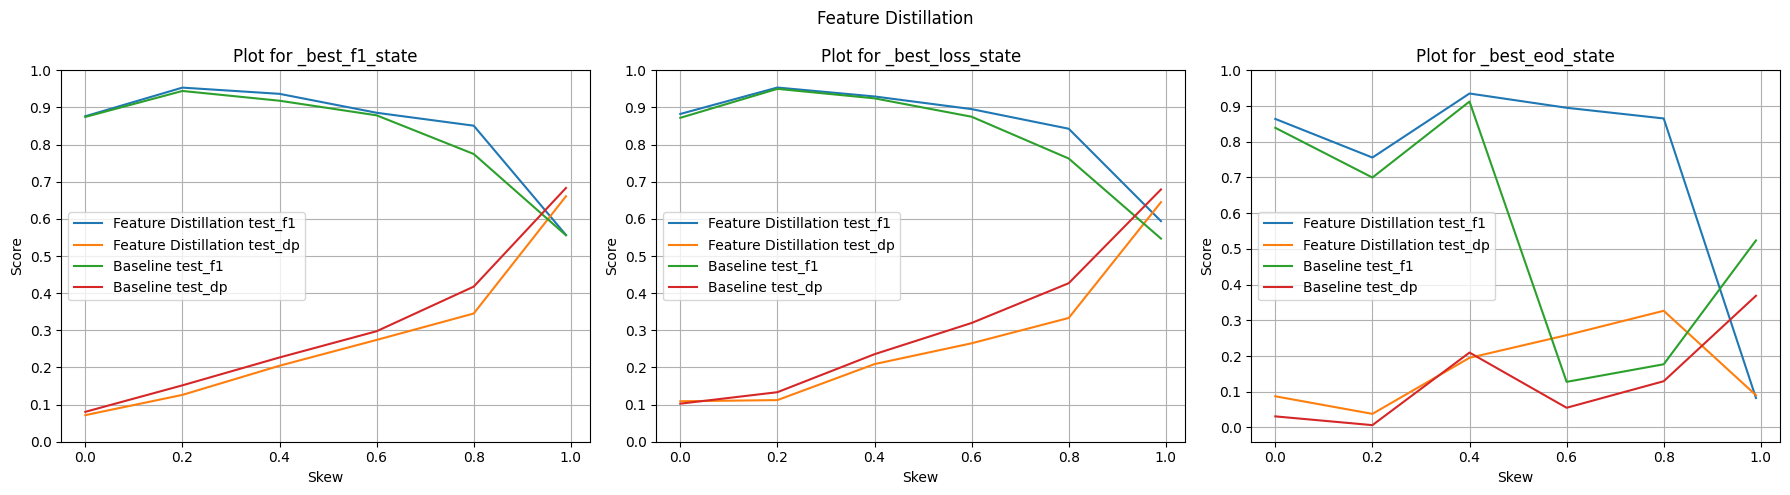

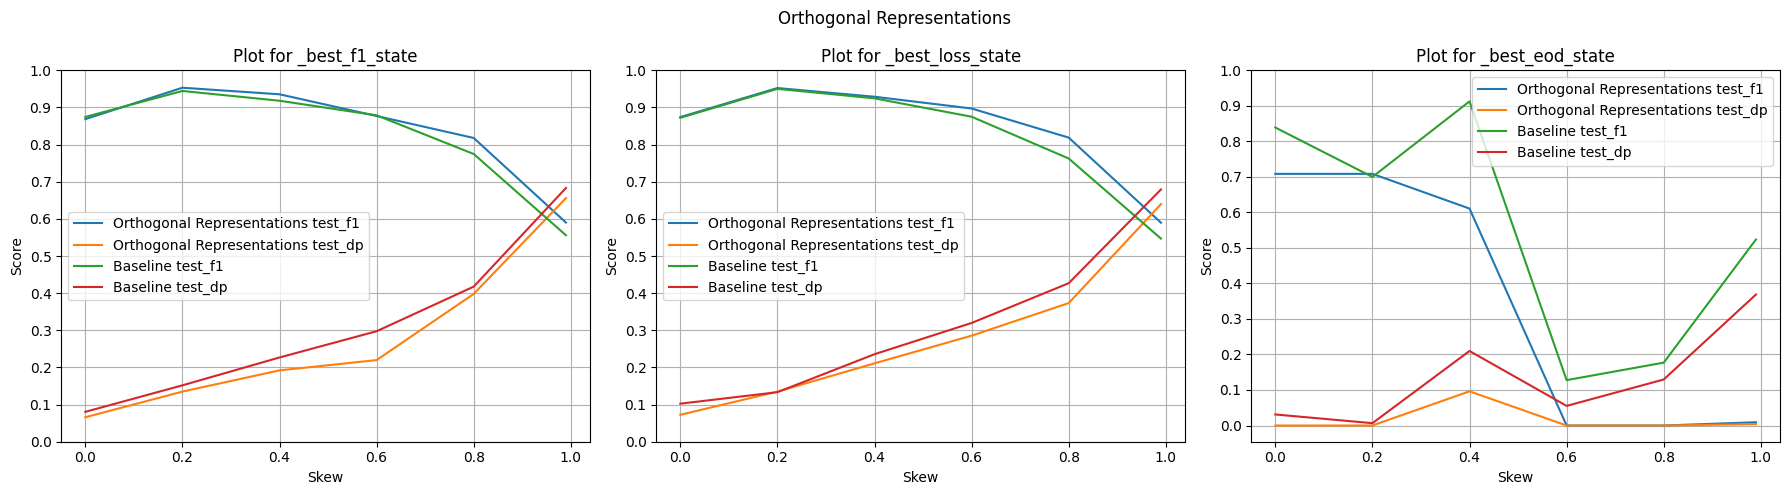

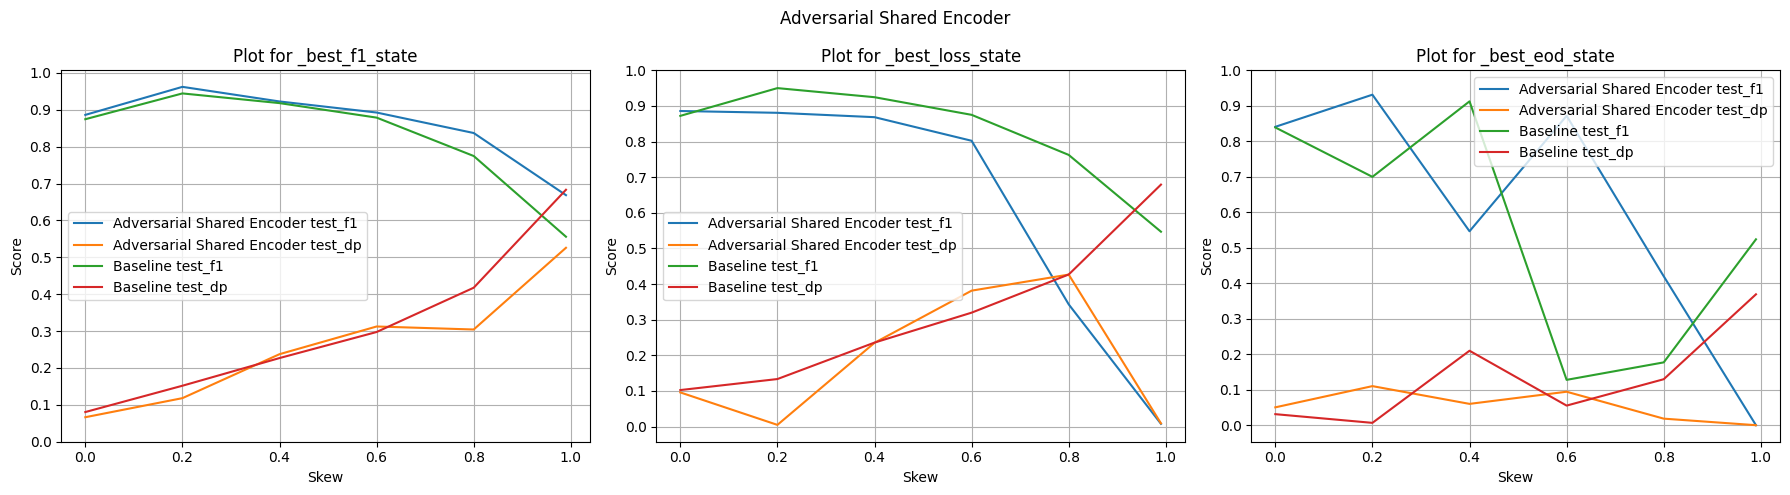

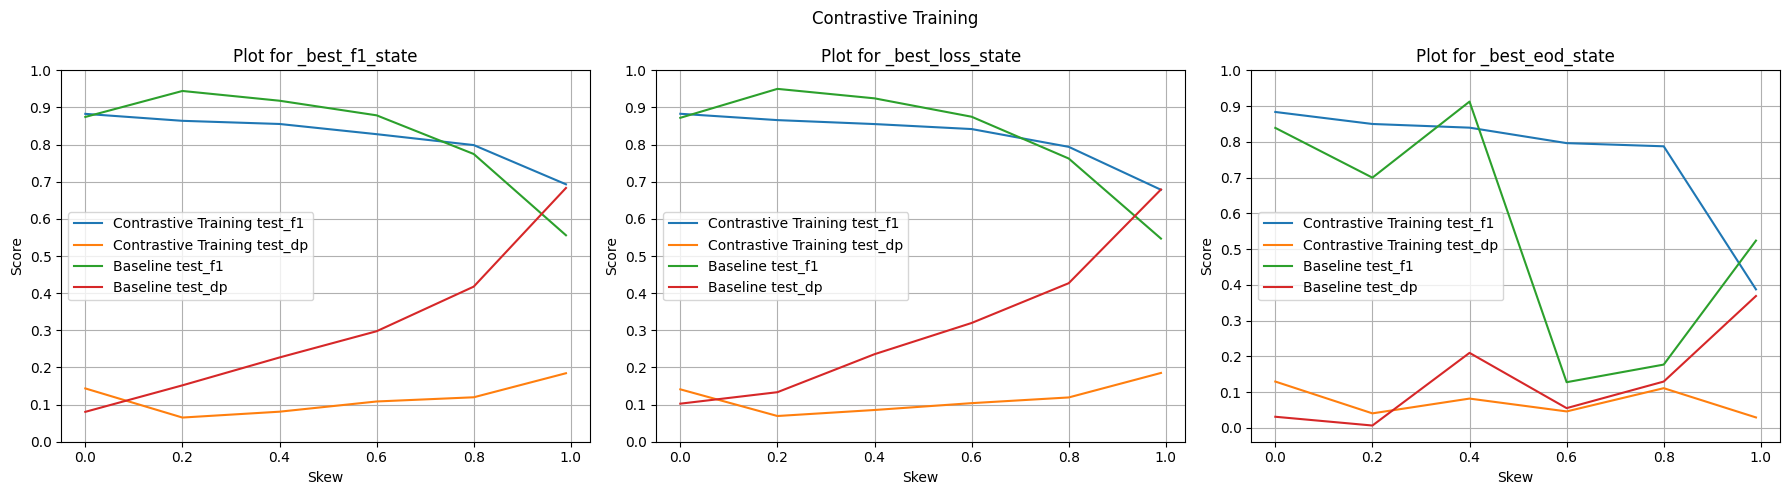

In [131]:
metrics = ['test_f1', "test_dp"]
for a in approaches:
    processing_name = [a, "Baseline"]
    plot_metric_over_processing(csv_filenames, processing_name, metrics, "lfw", a)